In [630]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.tree import plot_tree

In [631]:
df = pd.read_csv("D:\Machine Learning\Decision_trees\loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,Ever_NPA
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,No
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Yes
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Yes
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Yes
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Yes


In [632]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status',
       'Ever_NPA'],
      dtype='object')

In [633]:
df.drop(['Ever_NPA', 'loan_id'], axis=1, inplace=True)

In [634]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [635]:
df.shape

(4269, 12)

In [636]:
df.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [637]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [638]:
df.dtypes

no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

In [639]:
xtrain, xtest, ytrain, ytest = train_test_split(df.iloc[:, 0:11],
                                                df.iloc[:, 11], test_size=0.3)

xtrain.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
825,4,Not Graduate,No,7300000,19800000,8,724,5500000,6000000,29000000,10300000
4069,0,Not Graduate,No,9300000,31900000,2,331,7100000,11200000,23700000,8000000
95,5,Graduate,No,300000,1100000,2,300,100000,500000,700000,400000
2653,2,Not Graduate,No,4400000,14200000,18,799,6300000,7800000,10800000,2400000
1078,5,Not Graduate,Yes,9800000,37900000,18,301,6700000,4900000,34300000,6200000


In [640]:
xtrain.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value'],
      dtype='object')

In [641]:
ohe = OneHotEncoder(drop="first", dtype=int)
xtrain_new = ohe.fit_transform(
    xtrain[[" education", " self_employed"]]
)
xtest_new = ohe.transform(xtest[[" education", " self_employed"]])

In [642]:
ytrain[0:10]

825      Approved
4069     Approved
95       Approved
2653     Approved
1078     Rejected
2019     Rejected
1941     Rejected
3458     Approved
1608     Approved
238      Approved
Name:  loan_status, dtype: object

In [643]:
le = LabelEncoder()
ytrain = le.fit_transform(ytrain)
ytest = le.transform(ytest)

In [644]:
ytrain[0:10]

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [645]:
xtrain.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
825,4,Not Graduate,No,7300000,19800000,8,724,5500000,6000000,29000000,10300000
4069,0,Not Graduate,No,9300000,31900000,2,331,7100000,11200000,23700000,8000000
95,5,Graduate,No,300000,1100000,2,300,100000,500000,700000,400000
2653,2,Not Graduate,No,4400000,14200000,18,799,6300000,7800000,10800000,2400000
1078,5,Not Graduate,Yes,9800000,37900000,18,301,6700000,4900000,34300000,6200000


In [646]:
xtrain_new = xtrain_new.toarray()
xtest_new = xtest_new.toarray()

In [647]:
xtrain = pd.DataFrame(
    np.hstack((
        xtrain[
            [
                " no_of_dependents",
                " income_annum",
                " loan_amount",
                " loan_term",
                " cibil_score",
                " residential_assets_value",
                " commercial_assets_value",
                " luxury_assets_value",
                " bank_asset_value"
            ]
        ].values,
        xtrain_new
    )),
    columns=[
        " no_of_dependents",
        " income_annum",
        " loan_amount",
        " loan_term",
        " cibil_score",
        " residential_assets_value",
        " commercial_assets_value",
        " luxury_assets_value",
        " bank_asset_value",
        " education",
        " self_employed"
    ]
)

xtest = pd.DataFrame(
    np.hstack((
        xtest[
            [
                " no_of_dependents",
                " income_annum",
                " loan_amount",
                " loan_term",
                " cibil_score",
                " residential_assets_value",
                " commercial_assets_value",
                " luxury_assets_value",
                " bank_asset_value"
            ]
        ].values,
        xtest_new
    )),
    columns=[
        " no_of_dependents",
        " income_annum",
        " loan_amount",
        " loan_term",
        " cibil_score",
        " residential_assets_value",
        " commercial_assets_value",
        " luxury_assets_value",
        " bank_asset_value",
        " education",
        " self_employed"
    ]
)

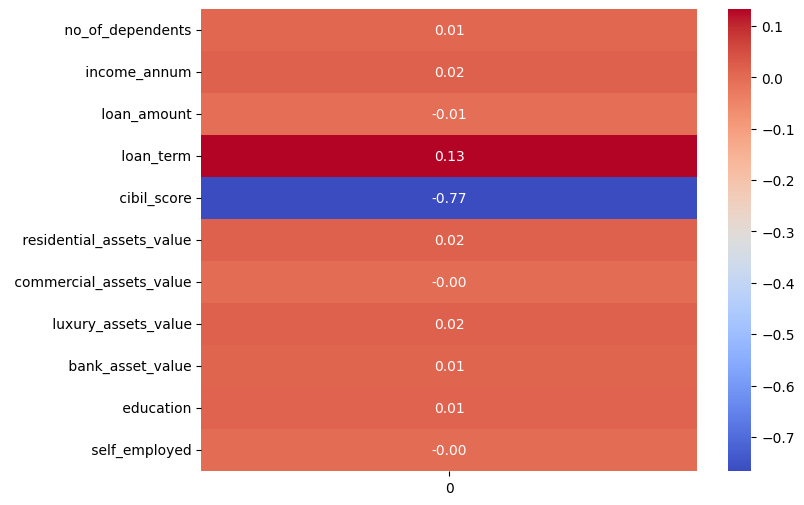

In [648]:
import seaborn as sns
ytrain_series = pd.Series(ytrain.flatten())  # Convert to 1D Series

plt.figure(figsize=(8, 6))
sns.heatmap(xtrain.corrwith(ytrain_series).to_frame(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [649]:
xtrain.shape

(2988, 11)

In [650]:
dct = DecisionTreeClassifier()
dct.fit(xtrain, ytrain)

pred = dct.predict(xtest)

In [651]:
accuracy_score(ytest, pred)

0.9765807962529274

In [652]:
f1_score(ytest, pred)

0.9692622950819673

In [653]:
pd.DataFrame(confusion_matrix(ytest, pred),columns=(False, True), index=(False, True))

,False,True
False,778,16
True,14,473


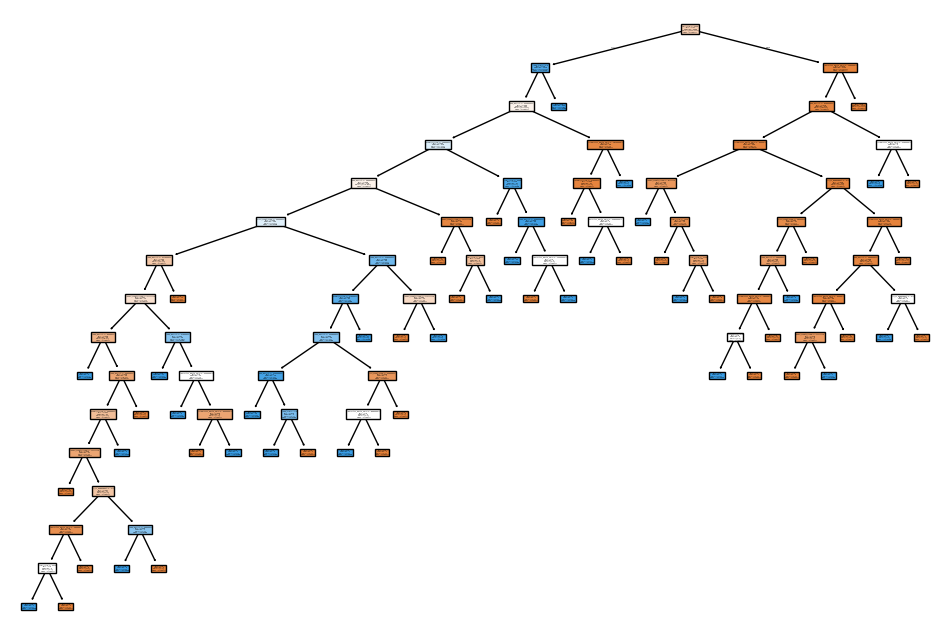

In [654]:
plt.figure(figsize=(12, 8))
plot_tree(dct, feature_names=xtrain.columns, class_names=["Rejected", "Approved"], filled=True)
plt.show()


In [655]:
dct.feature_importances_

array([3.23220637e-03, 1.37691327e-02, 4.47135408e-02, 8.05115282e-02,
       8.21833912e-01, 6.23012421e-03, 6.08056225e-03, 1.24135904e-02,
       1.05028248e-02, 7.12578198e-04, 0.00000000e+00])

In [656]:
import pickle

# Assuming 'model' is your trained model
with open("model.pkl", "wb") as f:
    pickle.dump(dct, f)
